In [7]:
from sko.GA import GA
from sko.PSO import PSO
from sko.DE import DE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
x = pd.read_csv('data/x_data.txt', delimiter='\t', header=None)
y = pd.read_csv('data/y_data.txt', delimiter='\t', header=None)

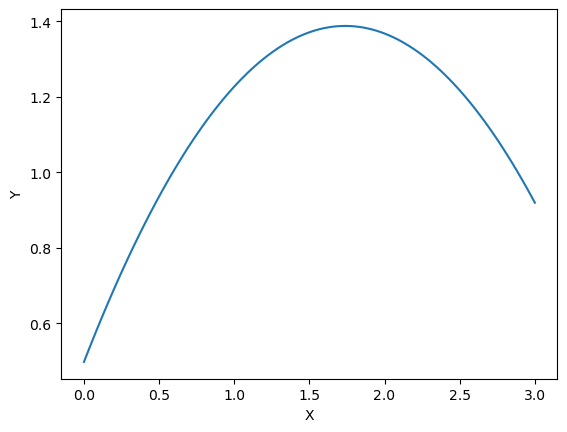

In [9]:
plt.plot(x, y)

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [10]:
def objective_function(params):
    a, b, c = params
    predicted_y = a + b * x + c * x**2
    mse = np.mean((predicted_y - y)**2)
    return mse

In [11]:
ga = GA(func=objective_function, n_dim=3, size_pop=100, max_iter=1000, prob_mut=0.003, lb=[-5] * 3, ub=[5] * 3, precision=1e-7)

In [12]:
pso = PSO(func=objective_function, dim=3, pop=50, max_iter=100, lb=[-5] * 3, ub=[5] * 3, w=0.8, c1=0.5, c2=0.5)

In [13]:
de = DE(func=objective_function, n_dim=3, size_pop=100, max_iter=500, lb=[-5] * 3, ub=[5] * 3)

In [14]:
best_params_ga, best_mse_ga = ga.run()

In [15]:
best_params_pso, best_mse_pso = pso.run()

In [16]:
best_params_de, best_mse_de = de.run()

In [17]:
optimal_a_ga, optimal_b_ga, optimal_c_ga = best_params_ga
optimal_a_pso, optimal_b_pso, optimal_c_pso = best_params_pso
optimal_a_de, optimal_b_de, optimal_c_de = best_params_de

In [18]:
print("Optimal values using GA:")
print("a:", optimal_a_ga)
print("b:", optimal_b_ga)
print("c:", optimal_c_ga)
print("Best MSE:", best_mse_ga)

Optimal values using GA:
a: 0.2627619002965229
b: 1.4404703411494966
c: -0.4269881950839478
Best MSE: [0.00862182]


In [19]:
print("Optimal values using PSO:")
print("a:", optimal_a_pso)
print("b:", optimal_b_pso)
print("c:", optimal_c_pso)
print("Best MSE:", best_mse_pso)

Optimal values using PSO:
a: 0.4980556240316049
b: 1.02318883094734
c: -0.29423627304975
Best MSE: [2.1825685e-09]


In [20]:
print("Optimal values using DE:")
print("a:", optimal_a_de)
print("b:", optimal_b_de)
print("c:", optimal_c_de)
print("Best MSE:", best_mse_de)

Optimal values using DE:
a: 0.4985011038906737
b: 1.0229698630681625
c: -0.29418999651800243
Best MSE: [6.42558302e-08]


In [21]:
y_ga = optimal_a_ga + optimal_b_ga * x + optimal_c_ga * x**2
y_pso = optimal_a_pso + optimal_b_pso * x + optimal_c_pso * x**2
y_de = optimal_a_de + optimal_b_de * x + optimal_c_de * x**2

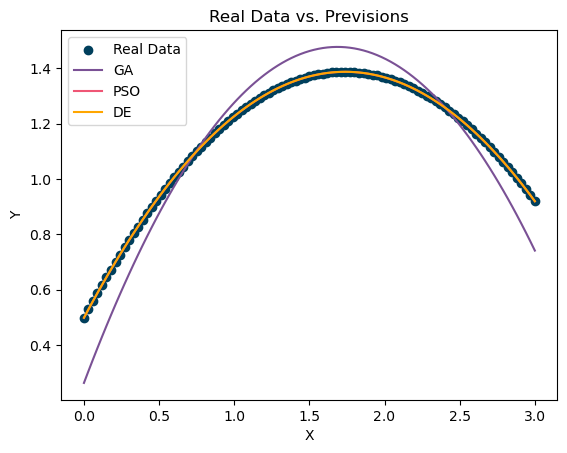

In [22]:
plt.scatter(x, y, label='Real Data', color='#003f5c')
plt.plot(x, y_ga, label='GA', color='#7a5195')
plt.plot(x, y_pso, label='PSO', color='#ef5675')
plt.plot(x, y_de, label='DE', color='#ffa600')
plt.title('Real Data vs. Previsions')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()

plt.show()